In [2]:
import yfinance as yf
import numpy as np

In [3]:
def download_stock_data(stock_name, start_date=None, end_date=None):
    data = yf.download(tickers=stock_name, start=start_date, end=end_date)

    return data

In [ ]:
df = yf.download(tickers="AAPL", start="2020-01-01", end="2025-04-24")

[*********************100%***********************]  1 of 1 completed


In [10]:
print(df.shape)

(1334, 5)


In [11]:
print(df.head(5))

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009140  72.771768  71.783985  71.941351  146322800
2020-01-06  72.582924  72.621661  70.876090  71.127881  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200


In [4]:
apple_data = download_stock_data("AAPL")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
print(apple_data.shape)

(11183, 5)


In [6]:
print(apple_data.tail(5))

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-04-21  193.160004  193.800003  189.809998  193.270004  46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995  52976400
2025-04-23  204.600006  208.000000  202.800003  206.000000  52929200
2025-04-24  208.369995  208.830002  202.940002  204.889999  47199300
2025-04-25  207.229996  209.249893  206.199997  206.429993   9335832


In [7]:
apple_data.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
from scipy import stats

In [33]:
# Z-Score（>3σ）处理异常数据，不建议
zscore_matrix = stats.zscore(apple_data)
print(zscore_matrix.shape)
print(zscore_matrix)

outliers = np.abs(zscore_matrix) > 3
print(outliers.shape)
print(outliers)

(11182, 5)
Price          Close      High       Low      Open    Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL
Date                                                        
1980-12-12 -0.474045 -0.474152 -0.474012 -0.474156  0.464454
1980-12-15 -0.474144 -0.474250 -0.474111 -0.474246 -0.412215
1980-12-16 -0.474276 -0.474380 -0.474245 -0.474378 -0.622021
1980-12-17 -0.474235 -0.474339 -0.474203 -0.474345 -0.679698
1980-12-18 -0.474185 -0.474290 -0.474153 -0.474296 -0.718551
...              ...       ...       ...       ...       ...
2025-04-17  3.298193  3.296078  3.291096  3.306383 -0.784687
2025-04-21  3.225002  3.200651  3.201774  3.231003 -0.798419
2025-04-22  3.351075  3.348439  3.321128  3.285668 -0.779776
2025-04-23  3.444192  3.470047  3.453464  3.475174 -0.779918
2025-04-24  3.516425  3.485793  3.456177  3.453883 -0.797053

[11182 rows x 5 columns]
(11182, 5)
Price       Close   High    Low   Open Volume
Ticker       AAPL   AAPL   AAPL   AAPL   AAPL
Date  

In [ ]:
# 检测是否有成交量为负数
(apple_data["Volume"] < 0).sum()

Ticker
AAPL    0
dtype: int64

C:\Users\陈树彦\AppData\Local\Temp\ipykernel_16976\3154512782.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


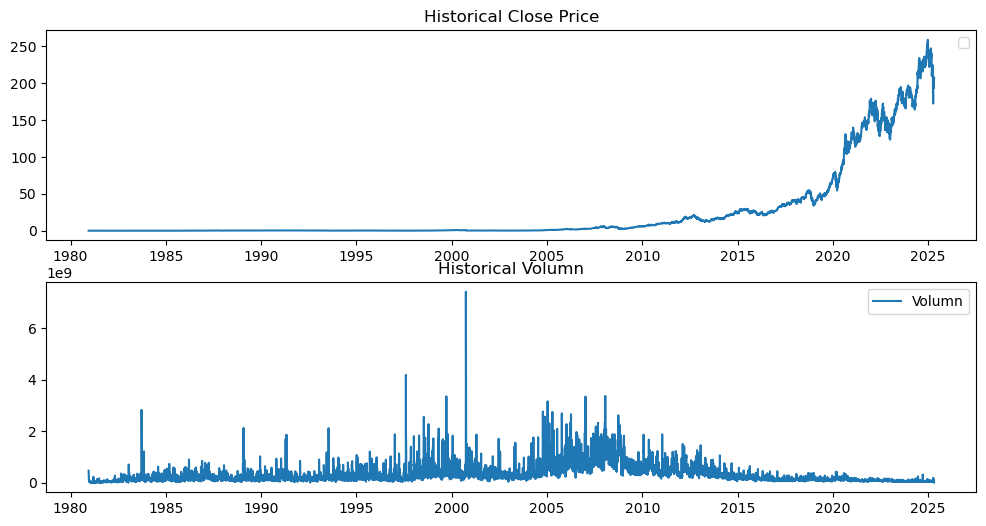

In [10]:
# 验证清洗效果
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Historical Close Price')
plt.legend()
plt.plot(apple_data["Close"], label="Close Price")
plt.subplot(2, 1, 2)
plt.title('Historical Volumn')
plt.plot(apple_data["Volume"], label="Volumn")
plt.legend()
plt.show()

In [1]:
from prophet import Prophet